In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Custom activation functions and derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)


In [12]:
# Neural Network class with training
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation='sigmoid'):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))
        
        # Set activation function
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_derivative = sigmoid_derivative
        elif activation == 'relu':
            self.activation = relu
            self.activation_derivative = relu_derivative
        else:
            raise ValueError("Unsupported activation function")
        
        # Loss history for visualization
        self.loss_history = []

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.activation(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = sigmoid(self.final_input)  # Output layer uses sigmoid
        return self.final_output
    
    def compute_loss(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)  # Mean Squared Error (MSE)
    
    def backward(self, X, y, lr):
        # Compute gradients
        output_error = self.final_output - y
        output_delta = output_error * sigmoid_derivative(self.final_input)

        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.activation_derivative(self.hidden_input)

        # Update weights and biases
        self.weights_hidden_output -= lr * np.dot(self.hidden_output.T, output_delta)
        self.bias_output -= lr * np.sum(output_delta, axis=0, keepdims=True)
        self.weights_input_hidden -= lr * np.dot(X.T, hidden_delta)
        self.bias_hidden -= lr * np.sum(hidden_delta, axis=0, keepdims=True)

    def train(self, X, y, epochs=1000, lr=0.1):
        for epoch in range(epochs):
            self.forward(X)
            loss = self.compute_loss(self.final_output, y)
            self.loss_history.append(loss)
            self.backward(X, y, lr)

In [13]:
# Generate XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])  # XOR labels

In [ ]:
# Train networks

nn_sigmoid = SimpleNeuralNetwork(2, 4, 1, activation='sigmoid')
nn_sigmoid.train(X, y, epochs=1000, lr=0.1)

nn_relu = SimpleNeuralNetwork(2, 4, 1, activation='relu')
nn_relu.train(X, y, epochs=1000, lr=0.1)

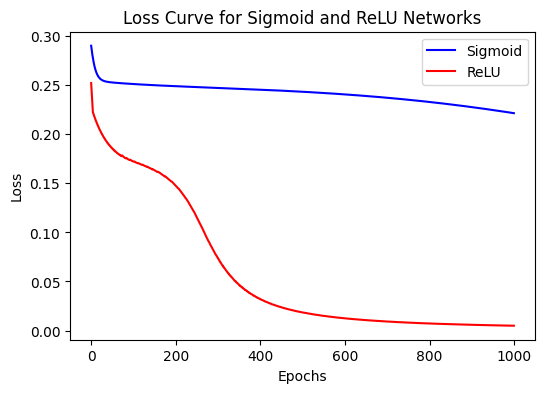

In [ ]:
# Plot Loss Curves

plt.figure(figsize=(6, 4))
plt.plot(nn_sigmoid.loss_history, label='Sigmoid', color='blue')
plt.plot(nn_relu.loss_history, label='ReLU', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve for Sigmoid and ReLU Networks')
plt.legend()
plt.show()